In [85]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [86]:
dataset = np.loadtxt('ex5.csv', delimiter=',')
X = dataset[:, :8]  # dataset has 9 columns
y = dataset[:, 8]

Zmienne wejściowe (kolejne kolumny): <br>

- Liczba ciąż
- Stężenie glukozy w osoczu po 2 godzinach w doustnym teście tolerancji glukozy
- Rozkurczowe ciśnienie krwi (mm Hg)
- Grubość fałdu skórnego tricepsa (mm)
- 2-godzinne stężenie insuliny w surowicy (μIU/ml)
- Wskaźnik masy ciała BMI (waga w kg/(wzrost w m)2)
- Funkcja rodowodu cukrzycy
- Wiek (lata)

---

- Y: Etykieta klasy (0 lub 1, nie ma lub ma cukrzyce) <br>


In [87]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [88]:

model = nn.Sequential(
    nn.Linear(8, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid())

In [89]:
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


In [90]:

# Importuj bibliotekę PyTorch.
import torch.nn as nn

# Definiuj klasę Classifier, która dziedziczy po nn.Module z PyTorch.


class Classifier(nn.Module):
    def __init__(self):
        super().__init__()

        # Definiuj warstwy sieci neuronowej.
        # Warstwa ukryta 1 z 8 wejściami i 12 wyjściami.
        self.hidden1 = nn.Linear(8, 12)
        self.act1 = nn.ReLU()  # Funkcja aktywacji ReLU po warstwie ukrytej 1.
        # Warstwa ukryta 2 z 12 wejściami i 8 wyjściami.
        self.hidden2 = nn.Linear(12, 8)
        self.act2 = nn.ReLU()  # Funkcja aktywacji ReLU po warstwie ukrytej 2.
        # Warstwa wyjściowa z 8 wejściami i 1 wyjściem.
        self.output = nn.Linear(8, 1)
        # Funkcja aktywacji Sigmoid po warstwie wyjściowej.
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        # Określa przód (forward pass) sieci neuronowej.
        # Przeprowadza dane przez warstwę ukrytą 1 z ReLU.
        x = self.act1(self.hidden1(x))
        # Przeprowadza dane przez warstwę ukrytą 2 z ReLU.
        x = self.act2(self.hidden2(x))
        # Przeprowadza dane przez warstwę wyjściową z Sigmoid.
        x = self.act_output(self.output(x))
        return x


# Tworzy instancję modelu klasyfikatora.
model = Classifier()

# Wyświetla definicję modelu.
print(model)

Classifier(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [91]:
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [92]:
# Liczba epok i rozmiar partii (batch size) w treningu.
n_epochs = 100
batch_size = 10


# Pętla treningowa po epokach.
for epoch in range(n_epochs):
    # Pętla treningowa po danych treningowych z podziałem na partie (mini-batch).
    for i in range(0, len(X), batch_size):
        # Wybiera partię danych treningowych.
        Xbatch = X[i:i+batch_size]

        # Przewiduje wyniki za pomocą modelu.
        y_pred = model(Xbatch)

        # Wybiera odpowiadające etykiety (klasy) dla partii danych.
        ybatch = y[i:i+batch_size]

        # Oblicza stratę (loss) między przewidywaniami a rzeczywistymi etykietami.
        loss = loss_fn(y_pred, ybatch)

        # Wyzerowuje gradienty w optymalizatorze.
        optimizer.zero_grad()

        # Oblicza gradienty straty wstecz (backpropagation).
        loss.backward()

        # Aktualizuje wagi modelu na podstawie gradientów.
        optimizer.step()

    # Wyświetla informacje o postępie treningu po każdej epoce.
    print(f'Epoka {epoch}, funkcja straty {loss}')

Epoka 0, funkcja straty 0.5716947317123413


Epoka 1, funkcja straty 0.581917405128479
Epoka 2, funkcja straty 0.5707693099975586
Epoka 3, funkcja straty 0.5653952360153198
Epoka 4, funkcja straty 0.5606678128242493
Epoka 5, funkcja straty 0.5577783584594727
Epoka 6, funkcja straty 0.5591139793395996
Epoka 7, funkcja straty 0.5655925869941711
Epoka 8, funkcja straty 0.570615828037262
Epoka 9, funkcja straty 0.5586743950843811
Epoka 10, funkcja straty 0.5425492525100708
Epoka 11, funkcja straty 0.5429487824440002
Epoka 12, funkcja straty 0.530396044254303
Epoka 13, funkcja straty 0.5359739661216736
Epoka 14, funkcja straty 0.5287646651268005
Epoka 15, funkcja straty 0.5270870923995972
Epoka 16, funkcja straty 0.5153329372406006
Epoka 17, funkcja straty 0.5185890197753906
Epoka 18, funkcja straty 0.5133798122406006
Epoka 19, funkcja straty 0.5096263289451599
Epoka 20, funkcja straty 0.5066708326339722
Epoka 21, funkcja straty 0.5051233172416687
Epoka 22, funkcja straty 0.4967620074748993
Epoka 23, funkcja straty 0.4922157824039459


In [93]:
# Ustaw tryb ewaluacji (bez obliczania gradientów) za pomocą torch.no_grad().
with torch.no_grad():
    # Przewiduje wyniki za pomocą modelu na całym zbiorze danych treningowych.
    y_pred = model(X)

# Oblicza dokładność (accuracy) modelu na danych treningowych.
# Dokładność to procent poprawnie sklasyfikowanych przykładów.
accuracy = (y_pred.round() == y).float().mean()

# Wyświetla wynik dokładności.
print(f"Accuracy {accuracy}")

Accuracy 0.76953125


In [119]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim


dataset = np.loadtxt('ex5.csv', delimiter=',')
X = dataset[:, 0:8]
y = dataset[:, 8]

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)


model = nn.Sequential(
    nn.Linear(8, 12),
    nn.ReLU(),
    nn.Linear(12, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)
print(model)


loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 200
batch_size = 15

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoka {epoch}, funkcja straty {loss}')

with torch.no_grad():
    y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=24, bias=True)
  (3): ReLU()
  (4): Linear(in_features=24, out_features=12, bias=True)
  (5): ReLU()
  (6): Linear(in_features=12, out_features=8, bias=True)
  (7): ReLU()
  (8): Linear(in_features=8, out_features=1, bias=True)
  (9): Sigmoid()
)
Epoka 0, funkcja straty 0.5814357995986938
Epoka 1, funkcja straty 0.5379676818847656
Epoka 2, funkcja straty 0.4910053014755249
Epoka 3, funkcja straty 0.4552798569202423
Epoka 4, funkcja straty 0.4347669184207916
Epoka 5, funkcja straty 0.4300808608531952
Epoka 6, funkcja straty 0.41787636280059814
Epoka 7, funkcja straty 0.398573637008667
Epoka 8, funkcja straty 0.4054475724697113
Epoka 9, funkcja straty 0.41282013058662415
Epoka 10, funkcja straty 0.3949800729751587
Epoka 11, funkcja straty 0.3941233456134796
Epoka 12, funkcja straty 0.3882039785385132
Epoka 13, funkcja straty 0.371805340051651
Epoka 14, funkcja str

In [95]:
# Znajdź odpowiednią warstwę, dla której chcesz uzyskać wagi
# Ostatnia warstwa `nn.Linear` (przed warstwą sigmoid)
desired_layer = model[-2]

# Teraz możesz uzyskać dostęp do wag warstwy
weights = desired_layer.weight

biases = desired_layer.bias

print("Wagi warstwy:", weights)

print("Obciążenia warstwy:", biases)

Wagi warstwy: Parameter containing:
tensor([[-0.3183, -0.4159,  0.3208,  0.2044,  0.2545, -0.2697, -0.3155, -0.1377]],
       requires_grad=True)
Obciążenia warstwy: Parameter containing:
tensor([-0.8315], requires_grad=True)


In [96]:

predictions = model(X)

rounded = predictions.round()

In [97]:

predictions = (model(X) > 0.5).int()

In [98]:
predictions = (model(X) > 0.5).int()
for i in range(10):
    print('%s => %d (oczekiwane %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.599998474121094, 0.6269999742507935, 50.0] => 1 (oczekiwane 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.600000381469727, 0.35100001096725464, 31.0] => 0 (oczekiwane 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.299999237060547, 0.671999990940094, 32.0] => 1 (oczekiwane 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.100000381469727, 0.16699999570846558, 21.0] => 0 (oczekiwane 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.099998474121094, 2.2880001068115234, 33.0] => 1 (oczekiwane 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.600000381469727, 0.20100000500679016, 30.0] => 0 (oczekiwane 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.24799999594688416, 26.0] => 0 (oczekiwane 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.29999923706055, 0.1340000033378601, 29.0] => 1 (oczekiwane 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.15800000727176666, 53.0] => 1 (oczekiwane 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.23199999332427979, 54.0] => 0 (oczekiwane 1)


In [114]:
# %pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.6 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.6 kB 281.8 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.6 kB 459.5 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.6 kB 602.4 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.6 kB 748.1 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.6 kB 860.2 kB/s eta 0:00:01
   -------------------------------

Macierz Pomyłek:
[[0.848      0.152     ]
 [0.41791045 0.58208955]]


<Axes: >

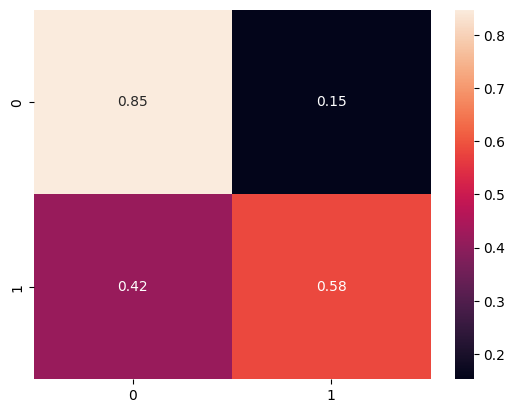

In [122]:
from sklearn.metrics import confusion_matrix

import seaborn as sns


confusion = confusion_matrix(y, predictions, normalize='true')

print("Macierz Pomyłek:")

print(confusion)

sns.heatmap(confusion, annot=True)